## Load Important Libiraries

In [61]:
import scipy

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scs
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import sys, os
import warnings
warnings.filterwarnings('ignore')

In [62]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
#from helpe_my_test import *
import pandas_profiling

## Load Data

In [63]:
# reading the csv file
missing_values = ["n/a", "na", "undefined", '']
df = pd.read_csv("../data/AdSmartABdata.csv", na_values=missing_values)
pd.set_option('display.max_columns', None)
df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


# General statistics


In [64]:
# number of elements in the df
df.size

72693

In [65]:
df.info()

(8077, 9)

In [24]:
#converting date and time to date_time
df['date']=pd.to_datetime(df['date'])
df['hour']=pd.to_datetime(df['hour'])

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   int8  
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), int8(1), object(4)
memory usage: 512.8+ KB


In [67]:
df=raw_data.copy()
#convert string to number
df['experiment']=df['experiment'].astype('category').cat.codes
df['device_make']=df['device_make'].astype('category').cat.codes
df['browser']=df['browser'].astype('category').cat.codes

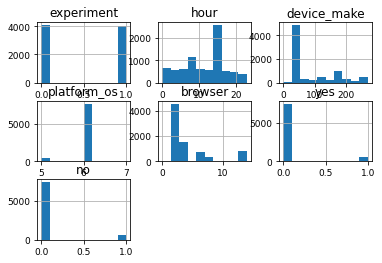

In [68]:
# histograms of the variables
fig = df.hist(xlabelsize=9, ylabelsize=9)
plt.show()

In [69]:
list(raw_data.columns)

['auction_id',
 'experiment',
 'date',
 'hour',
 'device_make',
 'platform_os',
 'browser',
 'yes',
 'no']

In [70]:
# descriptive statistics that summarize the central tendency, dispersion of the df's categorical columns, excluding NaN values
df.describe(include=[np.object]).T

,experiment,hour,device_make,platform_os,browser,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000,8077.000000,8077.000000,8077.000000
mean,0.495976,11.615080,93.095456,5.947134,4.097809,0.070818,0.083075
std,0.500015,5.734879,70.310654,0.224333,3.725419,0.256537,0.276013
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000


We have two unique values for experiment
-18 unique values for the browsers with Chrome mobile topping.
-270device makes and 8077 auction id,meaning each customer just had a single entry
-We have 8 unique dates

In [29]:
df["experiment"] = df["experiment"].astype("category")
df["device_make"] = df["device_make"].astype("category")
df["browser"] = df["browser"].astype("category")
df["auction_id"] = df["auction_id"].astype("category")

In [30]:
# descriptive statistics that summarize the central tendency, dispersion of the df's numerical columns, excluding NaN values
df.describe(include=[np.number]).T

experiment         hour  device_make  platform_os      browser  \
count  8077.000000  8077.000000  8077.000000  8077.000000  8077.000000   
mean      0.495976    11.615080    93.095456     5.947134     4.097809   
std       0.500015     5.734879    70.310654     0.224333     3.725419   
min       0.000000     0.000000     0.000000     5.000000     0.000000   
25%       0.000000     7.000000    46.000000     6.000000     2.000000   
50%       0.000000    13.000000    46.000000     6.000000     2.000000   
75%       1.000000    15.000000   141.000000     6.000000     4.000000   
max       1.000000    23.000000   269.000000     7.000000    14.000000   

               yes           no  
count  8077.000000  8077.000000  
mean      0.070818     0.083075  
std       0.256537     0.276013  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000

# Univariate Analysis

### Auction ID

In [71]:
# unique value counts
unique_counts = df['auction_id'].nunique()
unique_counts

8077

This indicates that each auction id is unique.

## Expierment

In [72]:
# unique value counts
counts_df = df['experiment'].value_counts()
counts_df

0    4071
1    4006
Name: experiment, dtype: int64

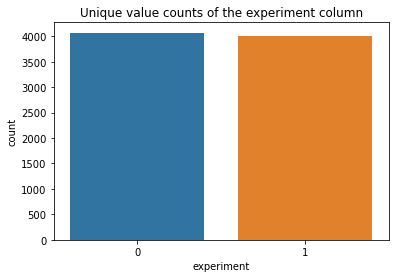

In [73]:
sns.countplot(data=df, x='experiment')
plt.title('Unique value counts of the experiment column');

#### This show us that the grouping of control and exposed is balanced in terms of numbers.

## Date

In [74]:
# unique value counts
counts_df = df['date'].value_counts()
counts_df

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
2020-07-05     890
2020-07-06     490
2020-07-07     480
Name: date, dtype: int64

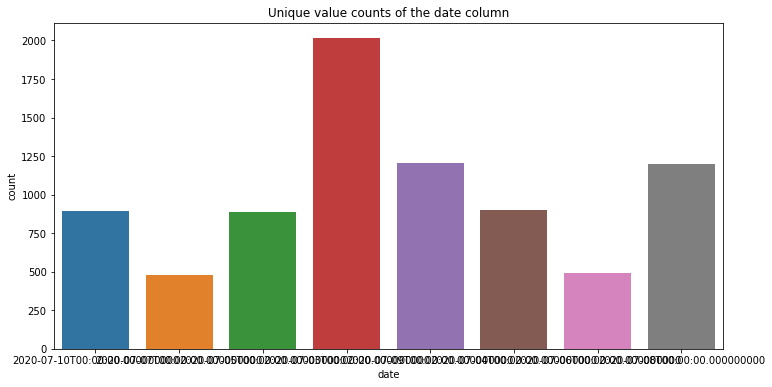

In [75]:
plt.figure(figsize=(12, 6))
plt.title('Unique value counts of the date column');
sns.countplot(data=df, x='date')
plt.show()

#### From the plot we can infer that the first day 2020/07/03 has recieved the highest number of visitors from the rest of the days.

## Hour

In [76]:
# unique value counts
counts_df = df['hour'].value_counts()
counts_df

1970-01-01 00:00:00.000000015    1895
1970-01-01 00:00:00.000000008     394
1970-01-01 00:00:00.000000007     381
1970-01-01 00:00:00.000000009     346
1970-01-01 00:00:00.000000010     336
1970-01-01 00:00:00.000000016     335
1970-01-01 00:00:00.000000006     327
1970-01-01 00:00:00.000000014     319
1970-01-01 00:00:00.000000005     302
1970-01-01 00:00:00.000000013     290
1970-01-01 00:00:00.000000011     282
1970-01-01 00:00:00.000000004     281
1970-01-01 00:00:00.000000012     278
1970-01-01 00:00:00.000000018     273
1970-01-01 00:00:00.000000003     266
1970-01-01 00:00:00.000000020     264
1970-01-01 00:00:00.000000017     263
1970-01-01 00:00:00.000000002     230
1970-01-01 00:00:00.000000019     227
1970-01-01 00:00:00.000000001     222
1970-01-01 00:00:00.000000021     206
1970-01-01 00:00:00.000000000     194
1970-01-01 00:00:00.000000022     135
1970-01-01 00:00:00.000000023      31
Name: hour, dtype: int64

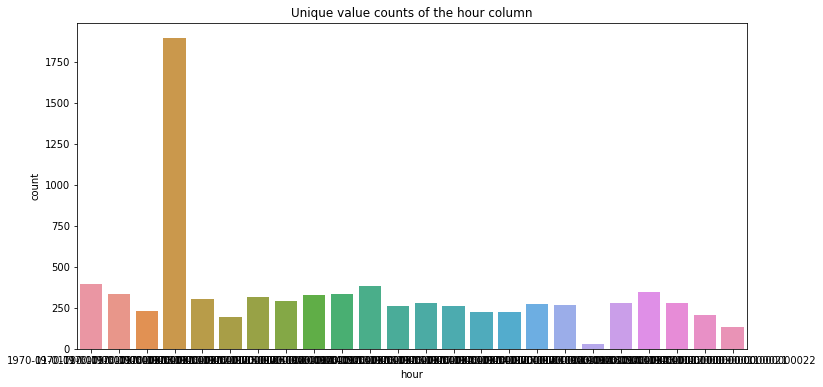

In [77]:
plt.figure(figsize=(12, 6))
plt.title('Unique value counts of the hour column')
sns.countplot(data=df, x='hour')
plt.show()

#### Hour 15 was the most busiest as the visitors traffic was very high almost 3 times the average of the rest hours.

## Device

In [78]:
# unique value counts
counts_df = df['device_make'].value_counts()
counts_df

46     4743
267     433
177     203
184     154
171     148
       ... 
126       1
22        1
150       1
51        1
259       1
Name: device_make, Length: 270, dtype: int64

In [79]:
df['device_make'].nunique()

270

## Platform Os

In [80]:
# unique value counts
counts_df = df['platform_os'].value_counts()
counts_df

6    7648
5     428
7       1
Name: platform_os, dtype: int64

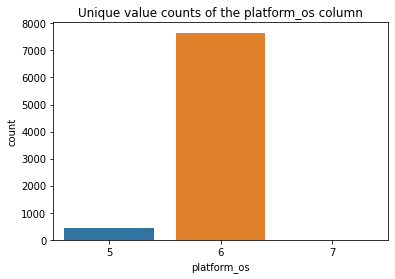

In [81]:
sns.countplot(data=df, x='platform_os')
plt.title('Unique value counts of the platform_os column');

## Browser

In [82]:
# unique value counts
counts_df = df['browser'].value_counts()
counts_df

2     4554
3     1489
14     824
6      764
8      337
4       51
9       44
1        3
12       3
11       3
10       1
5        1
0        1
7        1
13       1
Name: browser, dtype: int64

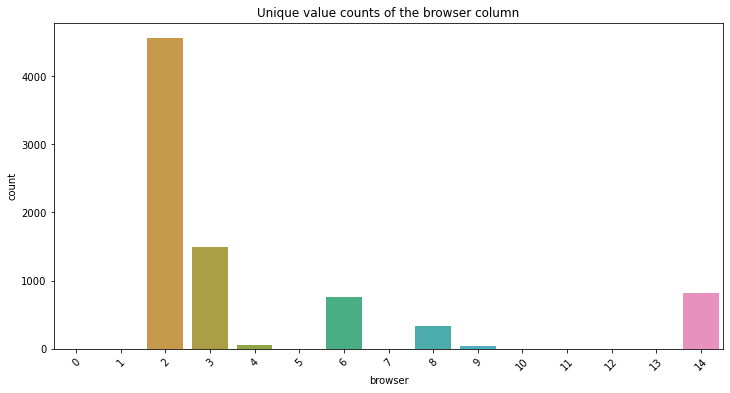

In [83]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="browser")
plt.title('Unique value counts of the browser column')
plt.xticks(rotation=45)
plt.show()

#### Chrome browsers are the most used browsers among the users.

## YES

In [84]:
# unique value counts
counts_df = df['yes'].value_counts()
counts_df

0    7505
1     572
Name: yes, dtype: int64

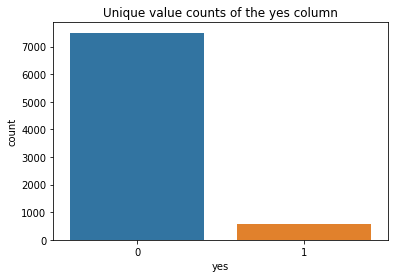

In [85]:
sns.countplot(data=df, x="yes")
plt.title('Unique value counts of the yes column')
plt.show()

## NO

In [86]:
# unique value counts
counts_df = df['no'].value_counts()
counts_df

0    7406
1     671
Name: no, dtype: int64

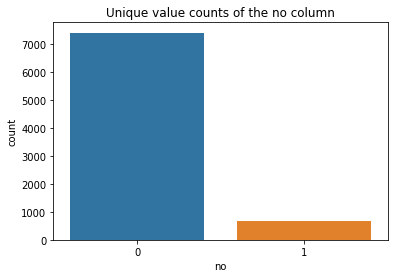

In [87]:
sns.countplot(data=df, x="no")
plt.title('Unique value counts of the no column')
plt.show()

# Bivariate Analysis

## Experiment and date

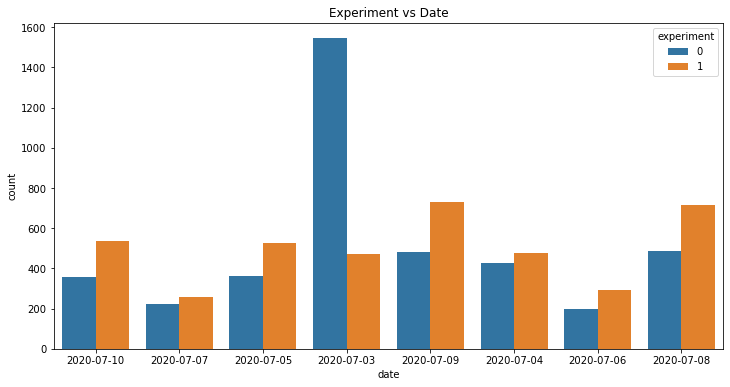

In [88]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="date", hue="experiment")
plt.title('Experiment vs Date')
plt.show()

#### In the first day around 3/4 of the visitors were from the control group. The rest of the days saw the dominance of the exposed group.

## Experiment and hour

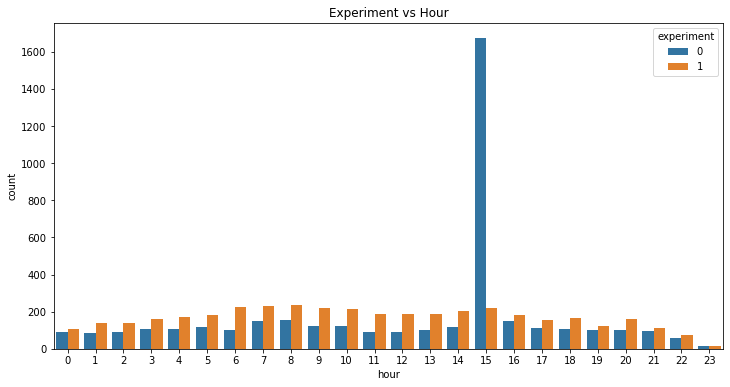

In [89]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="hour", hue="experiment")
plt.title('Experiment vs Hour')
plt.show()

#### Users from the control group were the most active at hour 15.

## Experiment and Browser

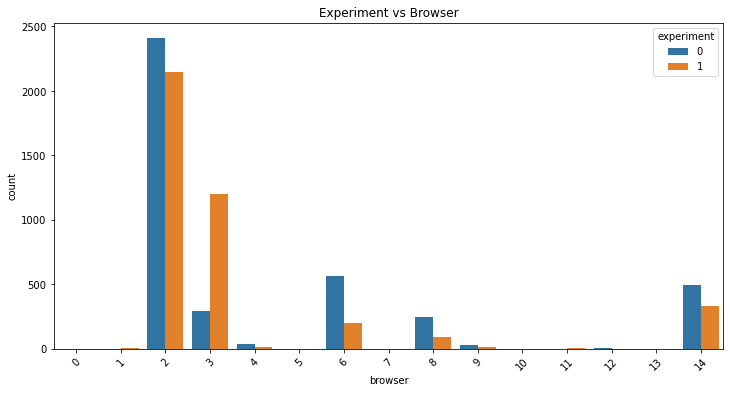

In [90]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="browser", hue="experiment")
plt.title('Experiment vs Browser')
plt.xticks(rotation=45)
plt.show()

## Experiment and OS

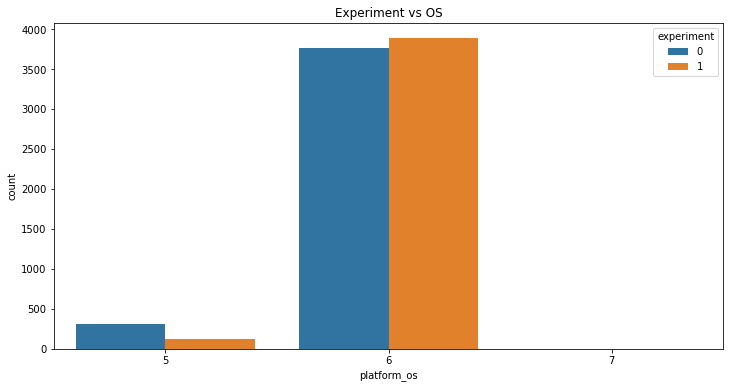

In [91]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="platform_os", hue="experiment")
plt.title('Experiment vs OS')
plt.show()

## Experiment and Yes

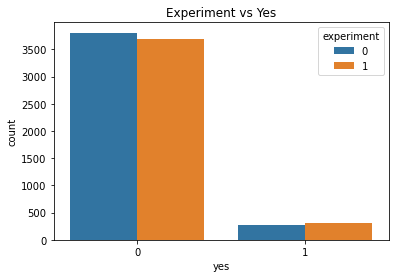

In [92]:
sns.countplot(data=df, x="yes", hue="experiment")
plt.title('Experiment vs Yes')
plt.show()

## Experiment and No

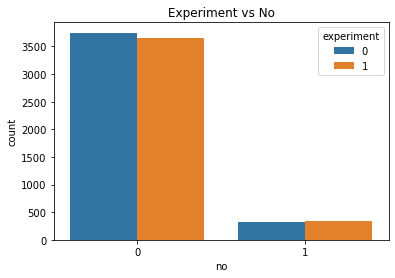

In [93]:
sns.countplot(data=df, x="no", hue="experiment")
plt.title('Experiment vs No')
plt.show()

# Corelation Analysis

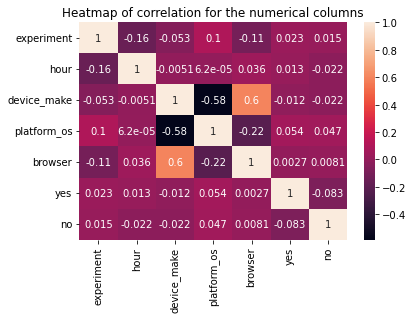

In [94]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of correlation for the numerical columns')
plt.show()

#### There is no significant correlation between the numerical columns.